In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

In [115]:
data=pd.read_csv("mhealth_raw_data.csv")

In [116]:
data.head(10)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1
5,2.2639,-9.4493,0.61267,0.098330,-0.84240,-0.68959,-8.7247,-4.0449,0.506090,-0.45686,-1.0082,0.025862,0,subject1
6,2.1740,-9.6574,0.60137,0.098330,-0.84240,-0.68959,-9.0864,-4.1474,0.261380,-0.42745,-1.0164,0.019397,0,subject1
7,2.2023,-9.4397,0.58129,0.098330,-0.84240,-0.68959,-9.0143,-4.0052,0.476820,-0.42745,-1.0164,0.019397,0,subject1
8,2.2037,-9.6283,0.54062,0.076067,-0.83114,-0.69155,-9.0469,-4.0475,0.245540,-0.42745,-1.0164,0.019397,0,subject1
9,2.2135,-9.6887,0.43353,0.076067,-0.83114,-0.69155,-8.8318,-4.1090,0.096632,-0.42745,-1.0164,0.019397,0,subject1


In [117]:
data['Activity'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5], dtype=int64)

In [118]:
data['subject'].unique()

array(['subject1', 'subject2', 'subject3', 'subject4', 'subject5',
       'subject6', 'subject7', 'subject8', 'subject9', 'subject10'],
      dtype=object)

In [119]:
data.shape

(1215745, 14)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 125.2+ MB


In [121]:
data.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [122]:
summary=data.describe()
summary

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


# Exploratory Data Analysis

# Univariate Analysis

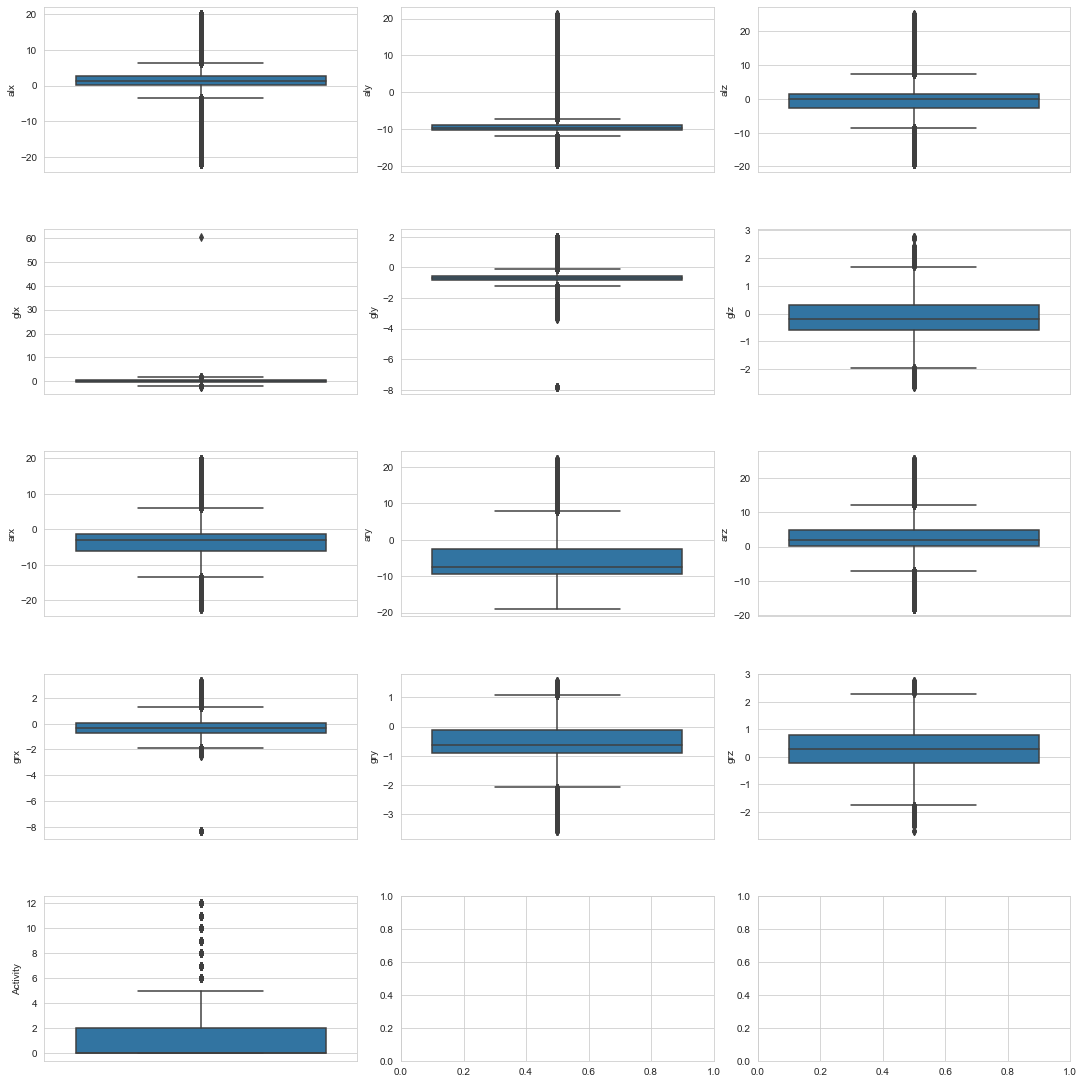

In [123]:
fig, ax = plt.subplots(ncols = 3, nrows = 5, figsize = (15,15))
index = 0
ax = ax.flatten()

for col, value in data.drop(columns=['subject']).items():
    if col != 'type':
        sns.boxplot(y=col, data = data.drop(columns=['subject']), ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0) 

<AxesSubplot:xlabel='Activity', ylabel='count'>

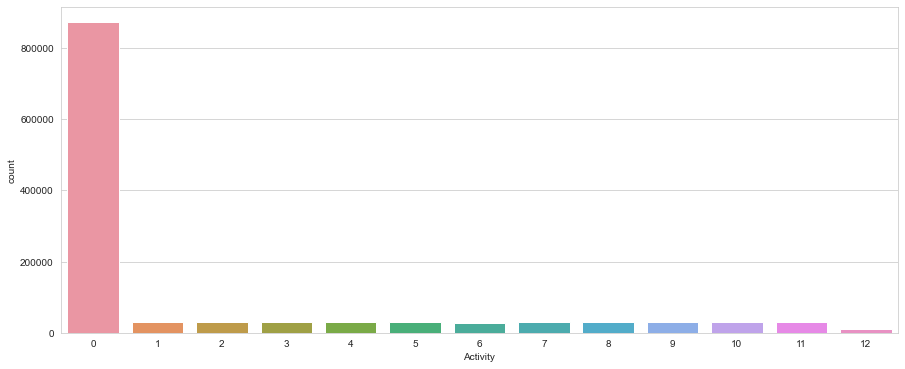

In [124]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,6))
sns.countplot(x = 'Activity', data = data)

<AxesSubplot:xlabel='subject', ylabel='count'>

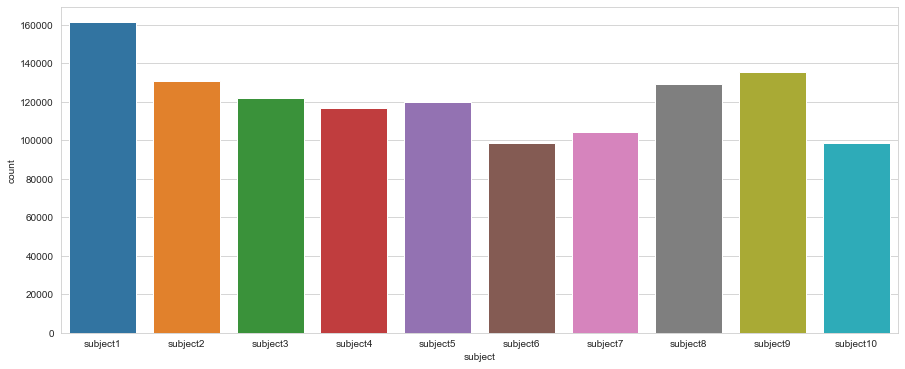

In [125]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,6))
sns.countplot(x = 'subject', data = data)

# Histogram

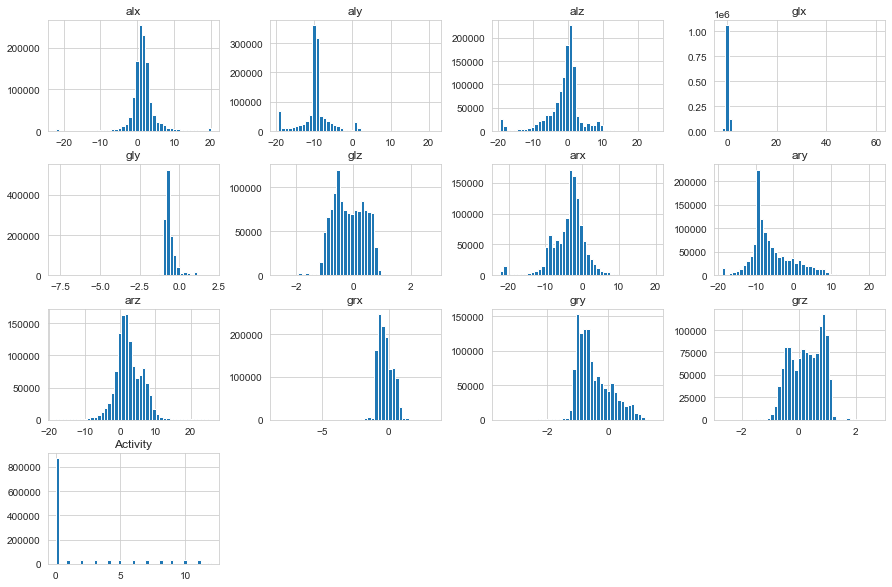

In [126]:
data.hist(bins = 45, figsize = (15,10))
plt.show()

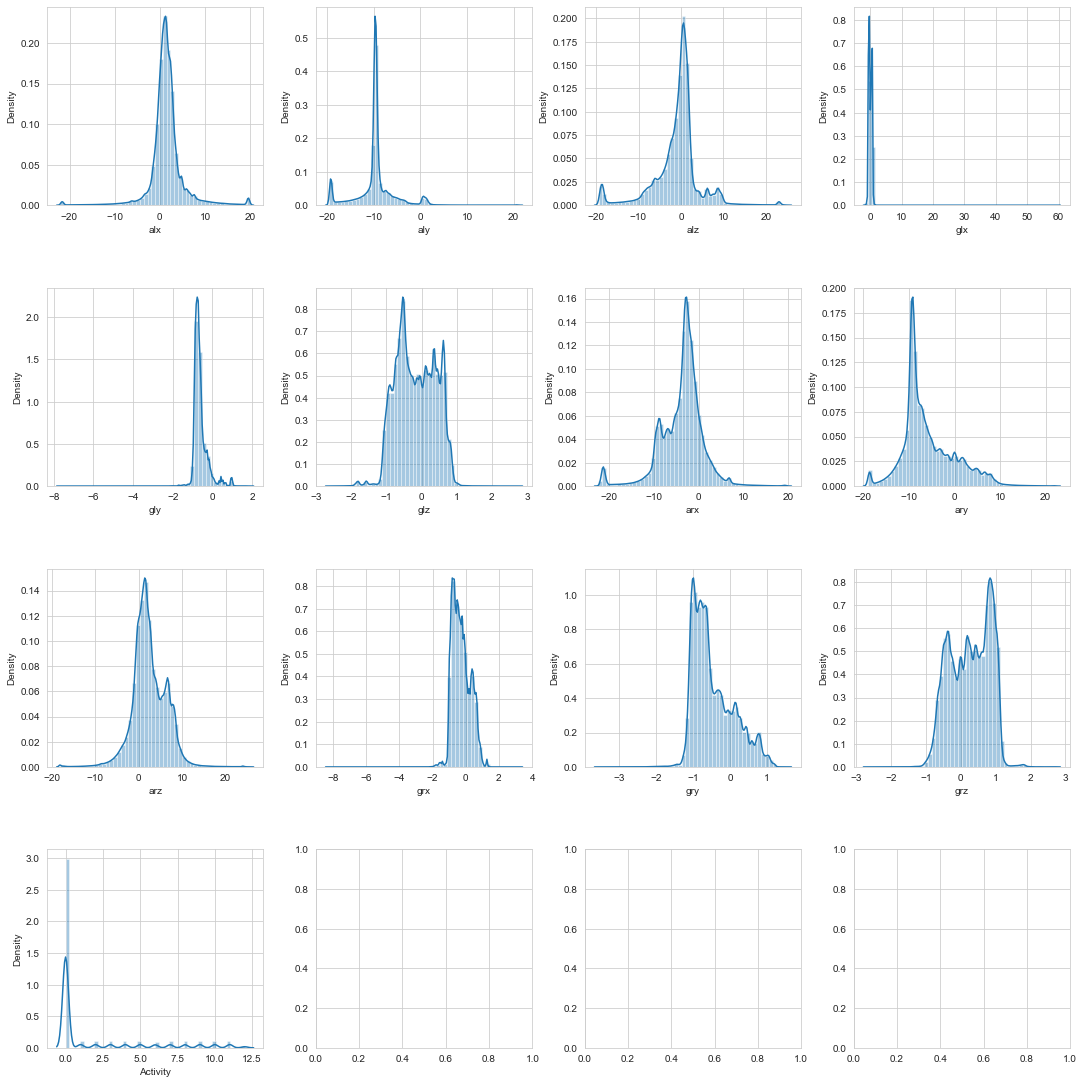

In [127]:
fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (15,15))
index = 0
ax = ax.flatten()

for col, value in data.drop(columns=['subject']).items():
    if col != 'type':
        sns.distplot(value, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

# Bivariate Analysis:

subject
subject1     1.229914
subject10    1.264998
subject2     1.203538
subject3     1.008831
subject4     0.955263
subject5     1.516916
subject6     2.831852
subject7     1.143347
subject8     2.242396
subject9     1.724875
Name: alx, dtype: float64

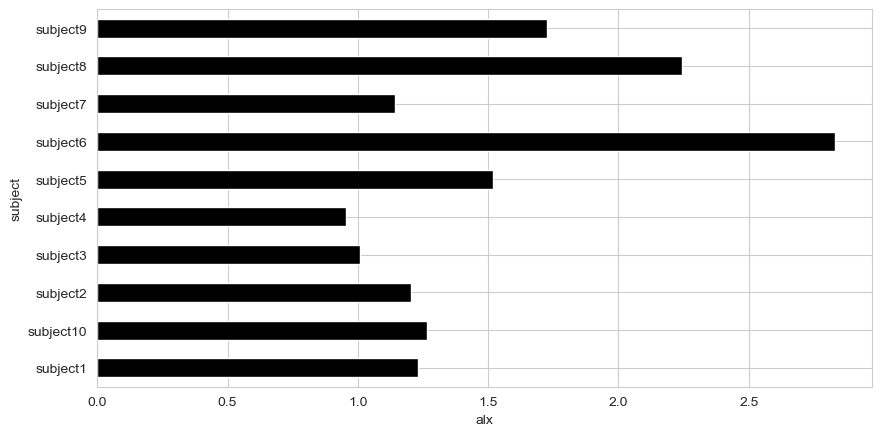

In [86]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['alx'].mean().plot(kind='barh',color='black')
plt.xlabel('alx')
data.groupby('subject')['alx'].mean()

* Volunteer no 6 have more acceleration from left ankle sensor on x-axis

subject
subject1     -9.667029
subject10    -9.931338
subject2     -9.673908
subject3     -9.682334
subject4     -9.141956
subject5     -9.930505
subject6     -9.617919
subject7     -9.870824
subject8     -9.353095
subject9    -10.084670
Name: aly, dtype: float64

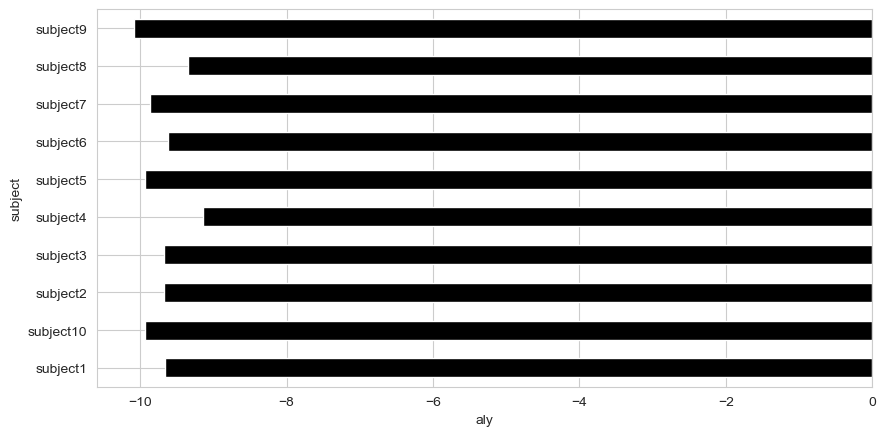

In [87]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['aly'].mean().plot(kind='barh',color='black')
plt.xlabel('aly')
data.groupby('subject')['aly'].mean()

* Volunteer No.9 have less acceleration from left ankle sensor on y-axis

subject
subject1    -1.650613
subject10   -1.222563
subject2    -1.947817
subject3    -0.838356
subject4    -0.915775
subject5    -0.979324
subject6     0.636321
subject7     0.090781
subject8    -1.444773
subject9    -0.585301
Name: alz, dtype: float64

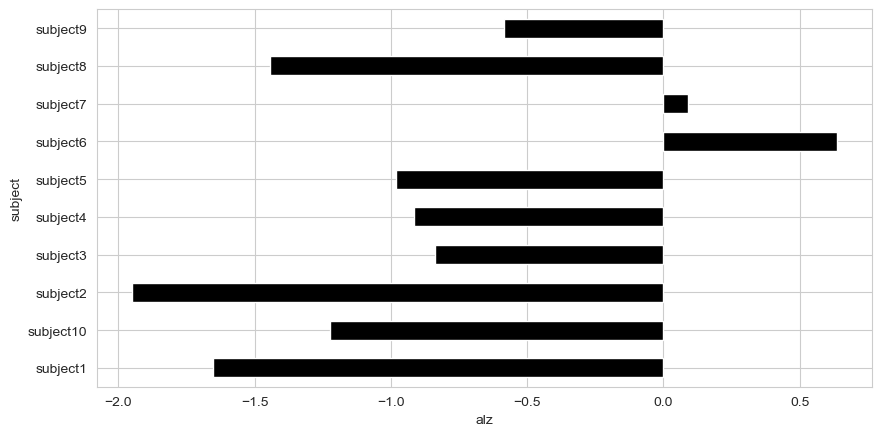

In [88]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['alz'].mean().plot(kind='barh',color='black')
plt.xlabel('alz')
data.groupby('subject')['alz'].mean()

* Volunteer number 6 have more acceleration from left ankle sensor & volunteer no 2 have less acceleration from left ankle sensor on z-axix.

subject
subject1     0.010649
subject10    0.056071
subject2    -0.145236
subject3    -0.094419
subject4    -0.234392
subject5    -0.090689
subject6     0.085483
subject7     0.202386
subject8     0.094516
subject9     0.131752
Name: glx, dtype: float64

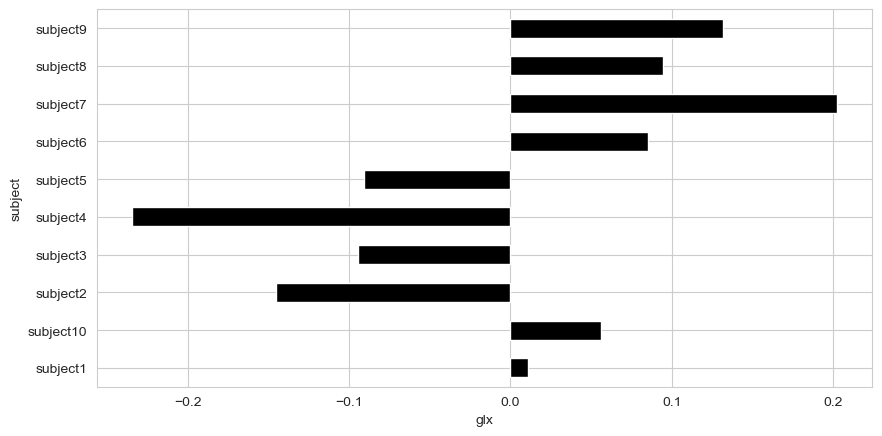

In [89]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['glx'].mean().plot(kind='barh',color='black')
plt.xlabel('glx')
data.groupby('subject')['glx'].mean()

* Volunteer no 7 have more gyro from the left-ankle sensor  on (X axis) & subject 4 have less gyro from left-ankle sensor on x-axis

subject
subject1    -0.663745
subject10   -0.621296
subject2    -0.664777
subject3    -0.600808
subject4    -0.567048
subject5    -0.645402
subject6    -0.594557
subject7    -0.653321
subject8    -0.516886
subject9    -0.625051
Name: gly, dtype: float64

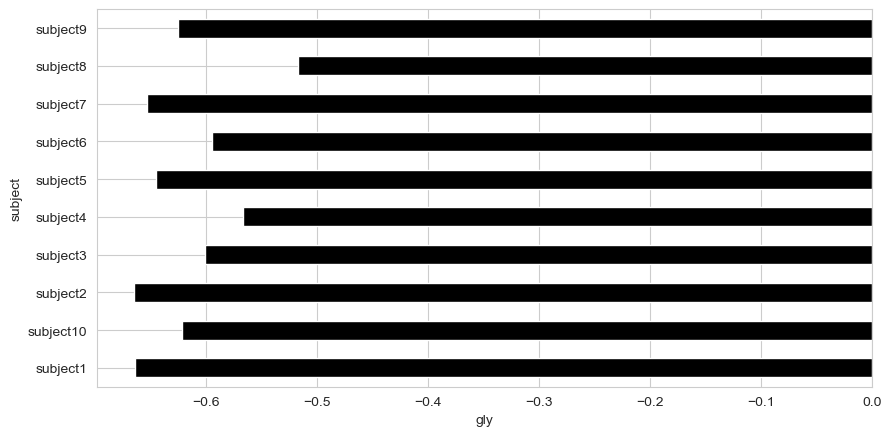

In [90]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['gly'].mean().plot(kind='barh',color='black')
plt.xlabel('gly')
data.groupby('subject')['gly'].mean()

* Volunteer no 2 have little bit less gyro from the left-ankle sensor on (y axis)

subject
subject1    -0.663745
subject10   -0.621296
subject2    -0.664777
subject3    -0.600808
subject4    -0.567048
subject5    -0.645402
subject6    -0.594557
subject7    -0.653321
subject8    -0.516886
subject9    -0.625051
Name: gly, dtype: float64

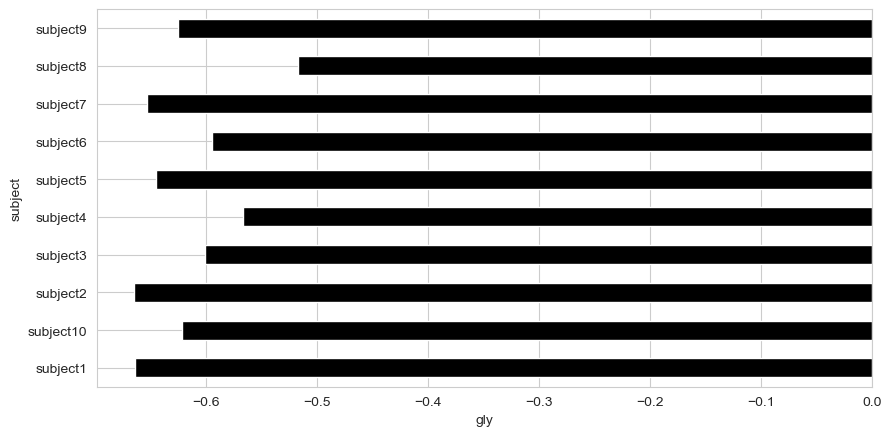

In [91]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['gly'].mean().plot(kind='barh',color='black')
plt.xlabel('gly')
data.groupby('subject')['gly'].mean()

* Volunteer no 2 have less gyro from the left-ankle sensor (yaxis)

subject
subject1    -0.123458
subject10   -0.382328
subject2    -0.253973
subject3    -0.127118
subject4    -0.274444
subject5    -0.061448
subject6    -0.121163
subject7     0.002063
subject8    -0.133995
subject9    -0.136695
Name: glz, dtype: float64

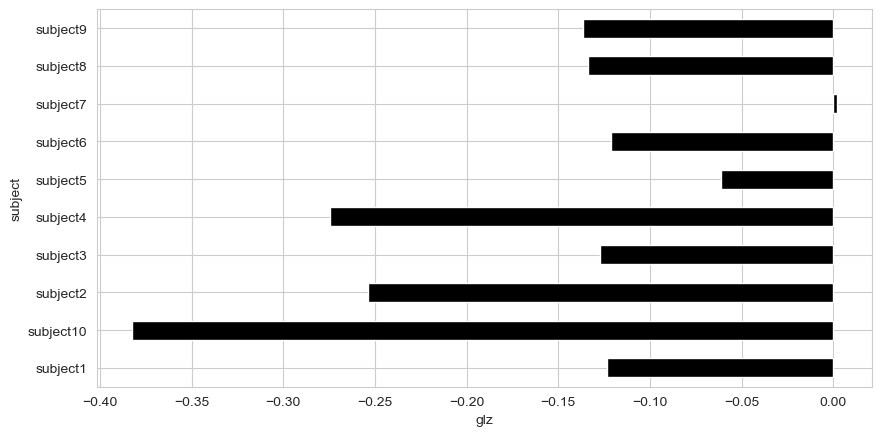

In [92]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['glz'].mean().plot(kind='barh',color='black')
plt.xlabel('glz')
data.groupby('subject')['glz'].mean()

* Amonst all volunteer, Volunteer no 7 have more gyro from the left-ankle sensor (X axis) 

subject
subject1    -4.178516
subject10   -4.143735
subject2    -4.248543
subject3    -2.524223
subject4    -2.404809
subject5    -3.936885
subject6    -4.566707
subject7    -2.165074
subject8    -4.142151
subject9    -4.501631
Name: arx, dtype: float64

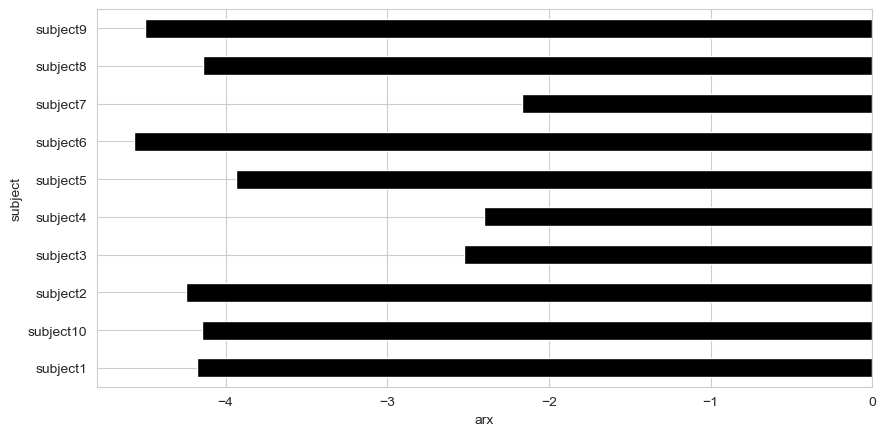

In [93]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['arx'].mean().plot(kind='barh',color='black')
plt.xlabel('arx')
data.groupby('subject')['arx'].mean()

* Volunteer no 6 have less acceleration from the right-lower-arm sensor (X axis)

subject
subject1    -4.873407
subject10   -7.060198
subject2    -4.827263
subject3    -6.315183
subject4    -6.264530
subject5    -5.596243
subject6    -5.463773
subject7    -6.683997
subject8    -6.101893
subject9    -5.565640
Name: ary, dtype: float64

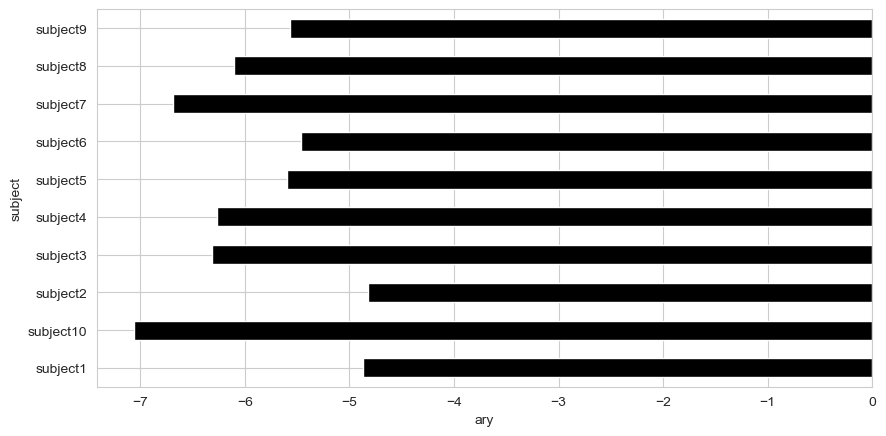

In [94]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['ary'].mean().plot(kind='barh',color='black')
plt.xlabel('ary')
data.groupby('subject')['ary'].mean()

* Volunteer no 10 have less acceleration from the right-lower-arm sensor (y axis)

subject
subject1     2.174713
subject10    0.819723
subject2     3.290395
subject3     2.710633
subject4     2.960003
subject5     3.129946
subject6     2.981879
subject7     3.484288
subject8     0.996673
subject9     1.570242
Name: arz, dtype: float64

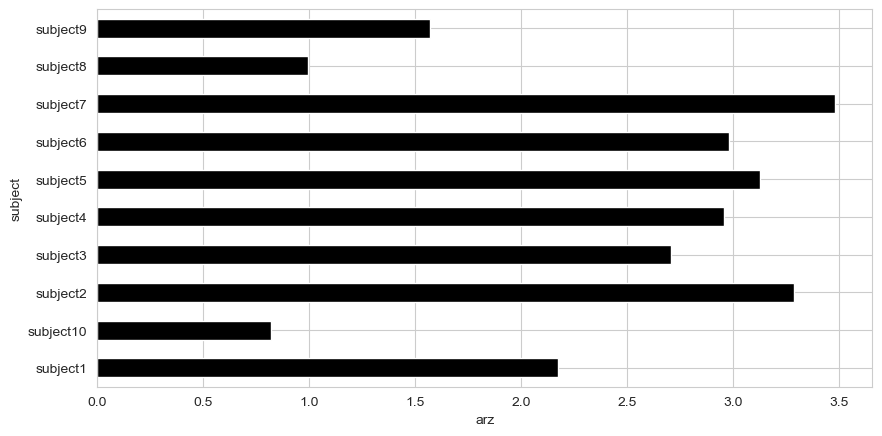

In [95]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['arz'].mean().plot(kind='barh',color='black')
plt.xlabel('arz')
data.groupby('subject')['arz'].mean()

* Volunteer no 7 have more acceleration from the right-lower-arm sensor (z axis)

subject
subject1    -0.405350
subject10   -0.169988
subject2    -0.384279
subject3    -0.170799
subject4    -0.341942
subject5    -0.379030
subject6    -0.337974
subject7     0.029126
subject8    -0.257391
subject9    -0.250366
Name: grx, dtype: float64

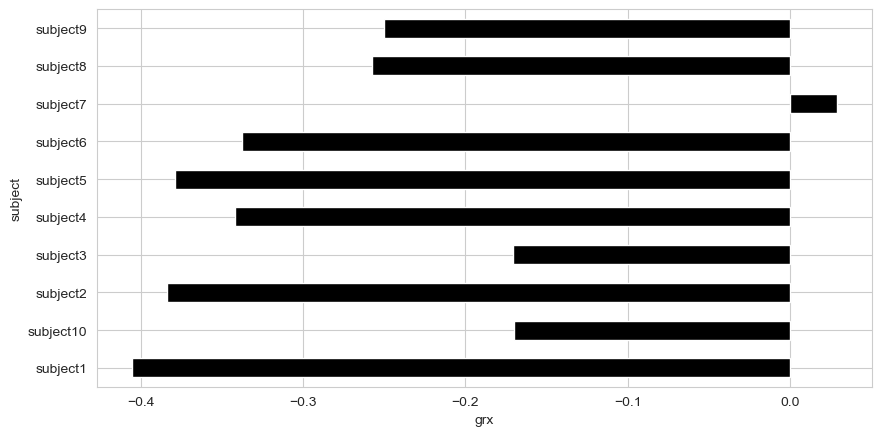

In [96]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['grx'].mean().plot(kind='barh',color='black')
plt.xlabel('grx')
data.groupby('subject')['grx'].mean()

* Volunteer no 7 have more gyro from the right-lower-arm sensor (y axis)

subject
subject1    -0.307315
subject10   -0.675274
subject2    -0.472784
subject3    -0.504068
subject4    -0.562621
subject5    -0.391029
subject6    -0.464668
subject7    -0.544649
subject8    -0.425070
subject9    -0.428370
Name: gry, dtype: float64

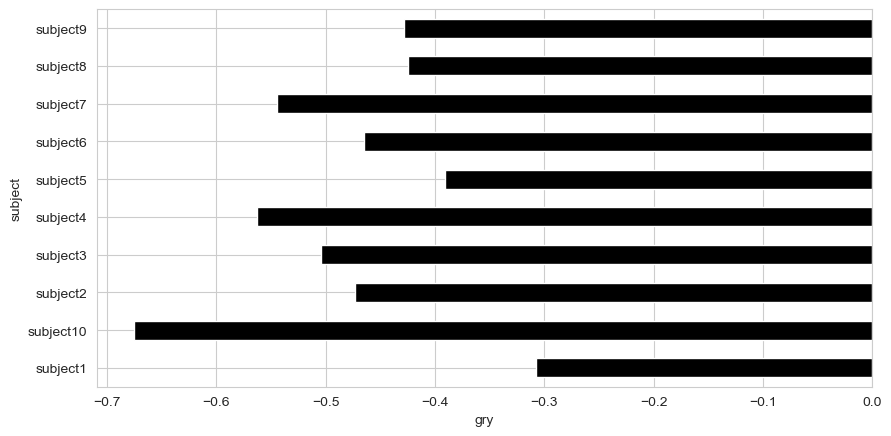

In [97]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['gry'].mean().plot(kind='barh',color='black')
plt.xlabel('gry')
data.groupby('subject')['gry'].mean()

* Volunteer no 10 have less gyro from the right-lower-arm sensor (y axis)

subject
subject1     0.312170
subject10    0.061737
subject2     0.206604
subject3     0.256421
subject4     0.181195
subject5     0.331710
subject6     0.272112
subject7     0.488833
subject8     0.222806
subject9     0.310783
Name: grz, dtype: float64

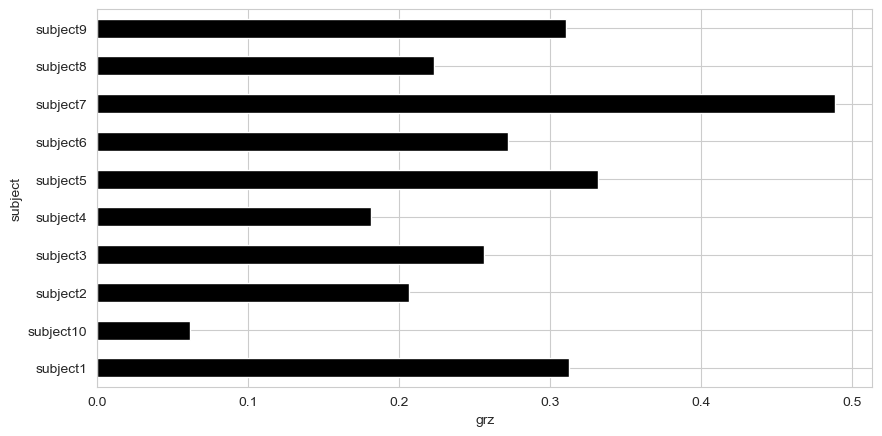

In [98]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('subject')['grz'].mean().plot(kind='barh',color='black')
plt.xlabel('grz')
data.groupby('subject')['grz'].mean()

* Volunteer no 7 have more gyro from the right-lower-arm sensor (z axis)

# Activity

Activity
0     1.371882
1     0.880712
2     1.763119
3     3.992484
4     2.033482
5     1.593512
6     0.129612
7     1.019735
8     1.237887
9     0.937118
10    2.641242
11    3.629201
12    1.239336
Name: alx, dtype: float64

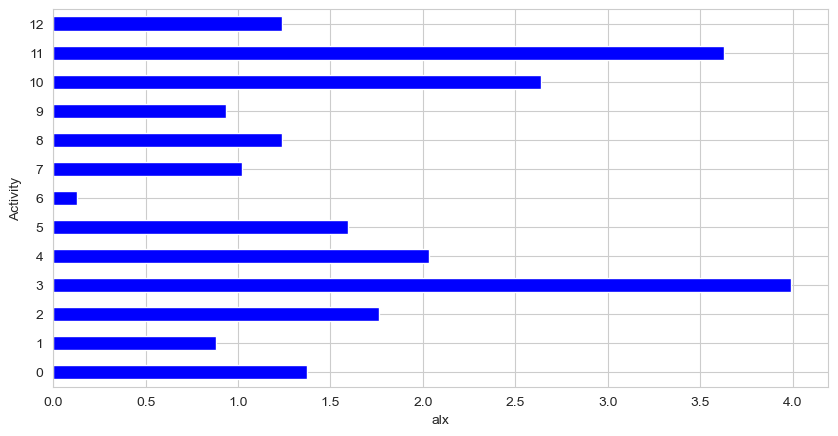

In [99]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['alx'].mean().plot(kind='barh',color='blue')
plt.xlabel('alx')
data.groupby('Activity')['alx'].mean()

* Activity Lying down and Running have more acceleration from the left-ankle sensor (X axis)

Activity
0     -9.941220
1     -9.692594
2     -9.003137
3      0.079345
4    -11.426602
5     -9.360755
6     -9.620421
7     -9.662342
8     -8.367275
9     -8.932914
10   -11.671131
11   -12.291468
12    -8.362211
Name: aly, dtype: float64

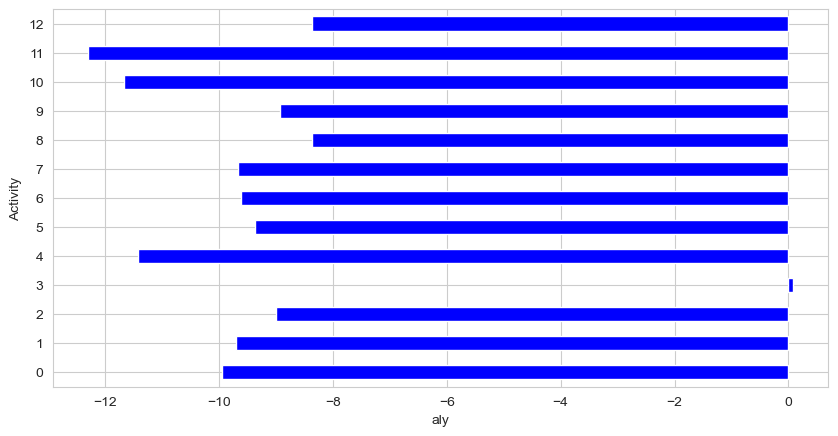

In [100]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['aly'].mean().plot(kind='barh',color='blue')
plt.xlabel('aly')
data.groupby('Activity')['aly'].mean()

* Activity Running, jogging and walking have less acceleration from the left-ankle sensor (y axis)

Activity
0    -1.054246
1     1.090515
2     0.340132
3     8.125242
4    -1.520106
5    -2.660131
6     1.152545
7     1.161270
8    -3.368386
9    -3.756302
10   -4.035657
11   -3.443592
12   -2.795051
Name: alz, dtype: float64

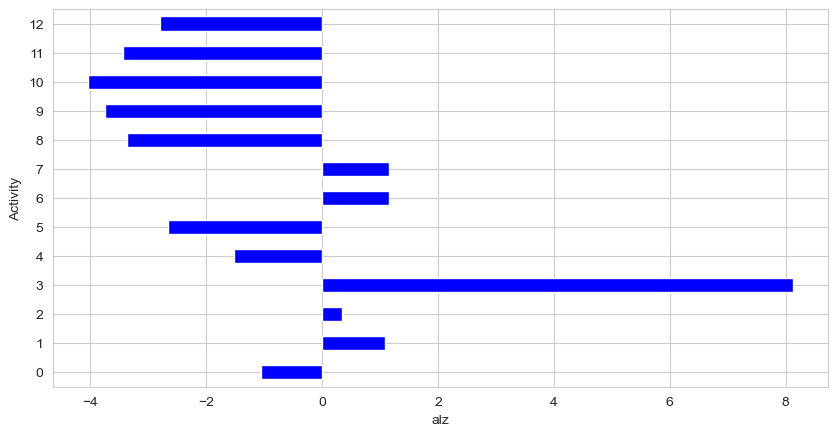

In [101]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['alz'].mean().plot(kind='barh',color='blue')
plt.xlabel('alz')
data.groupby('Activity')['alz'].mean()

* Activity Lying down have more acceleration from the left-ankle sensor (z axis)

Activity
0    -0.042019
1    -0.082124
2     0.168040
3     0.365810
4     0.247065
5     0.142348
6    -0.209154
7    -0.131541
8    -0.044294
9     0.328212
10   -0.001277
11    0.318641
12    0.013778
Name: glx, dtype: float64

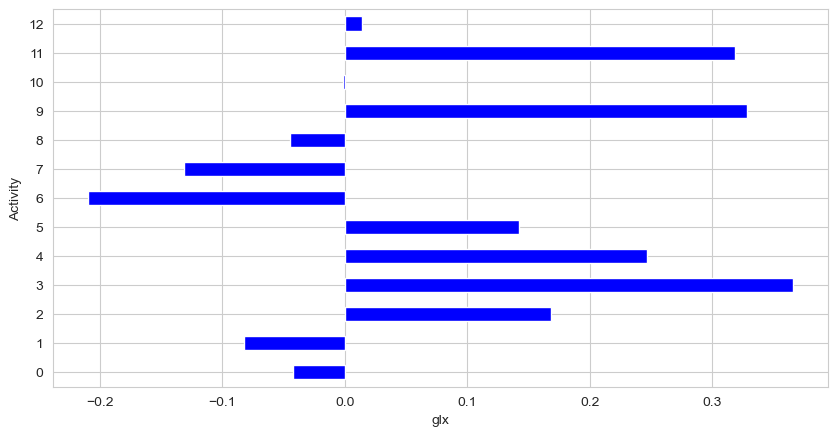

In [102]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['glx'].mean().plot(kind='barh',color='blue')
plt.xlabel('glx')
data.groupby('Activity')['glx'].mean()

* Activity Lying down, Cycling and Running have more gyro from the left-ankle sensor (X axis)

Activity
0    -0.642863
1    -0.663589
2    -0.672322
3     0.445411
4    -0.666770
5    -0.531298
6    -0.739590
7    -0.743848
8    -0.589556
9    -0.738239
10   -0.497880
11   -0.642266
12   -0.651290
Name: gly, dtype: float64

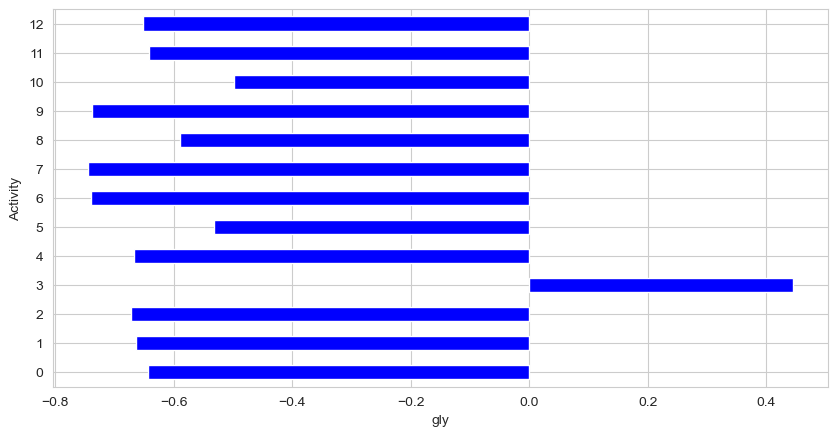

In [103]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['gly'].mean().plot(kind='barh',color='blue')
plt.xlabel('gly')
data.groupby('Activity')['gly'].mean()

* Activity Lying down have more gyro from the left-ankle sensor (y axis)

Activity
0    -0.173584
1     0.251740
2    -0.114962
3     0.386379
4    -0.013197
5    -0.240442
6    -0.026061
7    -0.001570
8    -0.568034
9    -0.098896
10   -0.608171
11   -0.224011
12   -0.367888
Name: glz, dtype: float64

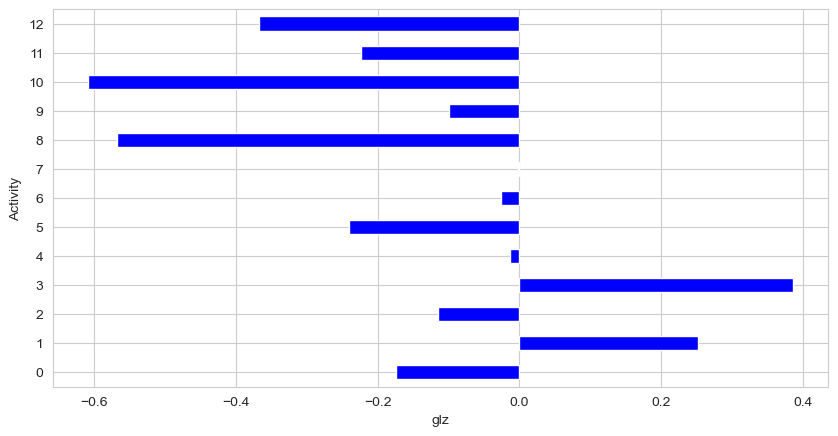

In [104]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['glz'].mean().plot(kind='barh',color='blue')
plt.xlabel('glz')
data.groupby('Activity')['glz'].mean()

* Activity Lying down and standing still have more gyro from the left-ankle sensor (z axis)

Activity
0    -3.817727
1    -2.440308
2    -6.026024
3    -4.071781
4    -2.568092
5    -2.568783
6    -1.877606
7    -1.344431
8    -1.556292
9     0.906946
10   -7.869296
11   -7.672636
12   -5.070618
Name: arx, dtype: float64

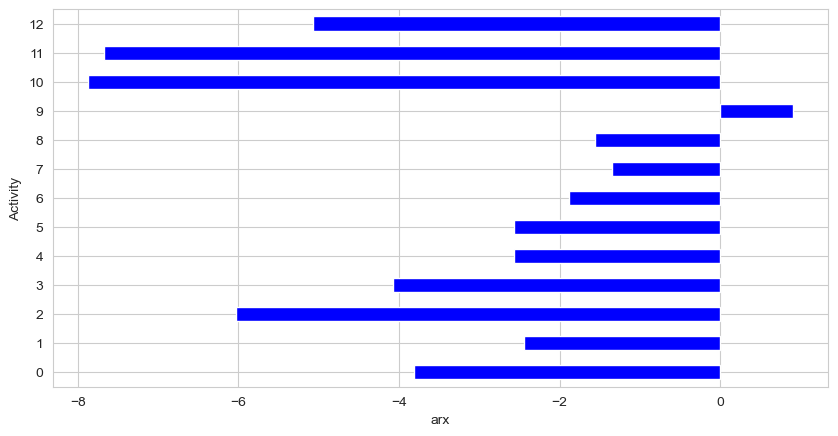

In [105]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['arx'].mean().plot(kind='barh',color='blue')
plt.xlabel('arx')
data.groupby('Activity')['arx'].mean()

* Activity Cycling have more acceleration from the right-lower-arm sensor (X axis)

Activity
0    -5.814998
1    -9.303726
2    -4.440557
3     2.665747
4    -9.488163
5    -9.163697
6    -9.311062
7    -2.393701
8    -9.370363
9    -6.536909
10   -2.763794
11   -4.719071
12   -3.011410
Name: ary, dtype: float64

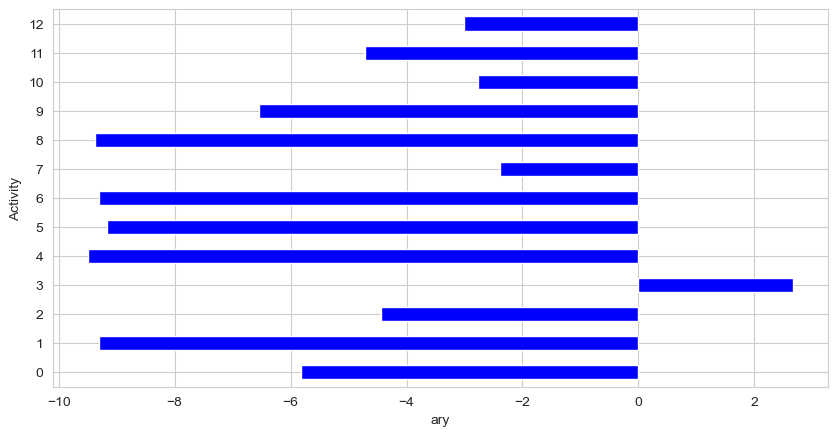

In [106]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['ary'].mean().plot(kind='barh',color='blue')
plt.xlabel('ary')
data.groupby('Activity')['ary'].mean()

* Activity Lying down have more acceleration from the right-lower-arm sensor (y axis)

Activity
0     2.398882
1     1.139256
2     3.999059
3     5.837253
4     1.439755
5     1.010672
6     0.516776
7     5.200609
8     1.224290
9     6.699978
10    0.132237
11   -0.666658
12    1.130398
Name: arz, dtype: float64

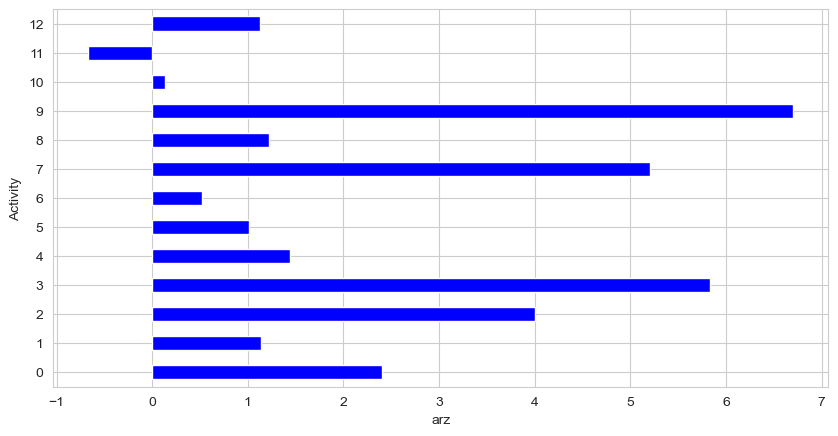

In [107]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['arz'].mean().plot(kind='barh',color='blue')
plt.xlabel('arz')
data.groupby('Activity')['arz'].mean()

* Activity cycling have more acceleration from the right-lower-arm sensor (z axis)

Activity
0    -0.305421
1    -0.340318
2    -0.302512
3     0.007526
4    -0.202272
5    -0.092406
6    -0.206003
7    -0.166570
8    -0.123711
9     0.580200
10   -0.695951
11   -0.534553
12   -0.605920
Name: grx, dtype: float64

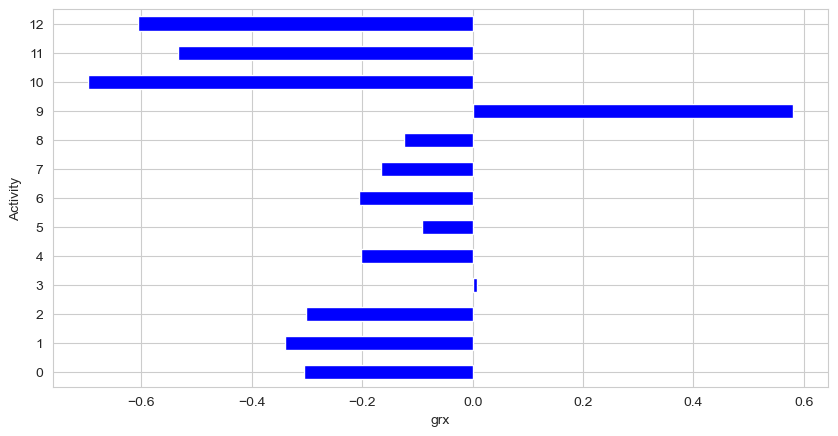

In [108]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['grx'].mean().plot(kind='barh',color='blue')
plt.xlabel('grx')
data.groupby('Activity')['grx'].mean()

* Activity jogging have more gyro from the right-lower-arm sensor (X axis)

Activity
0    -0.488428
1    -0.746303
2    -0.221811
3     0.487398
4    -0.708666
5    -0.672247
6    -0.850182
7    -0.092612
8    -0.861372
9    -0.513375
10   -0.367134
11   -0.032328
12   -0.346705
Name: gry, dtype: float64

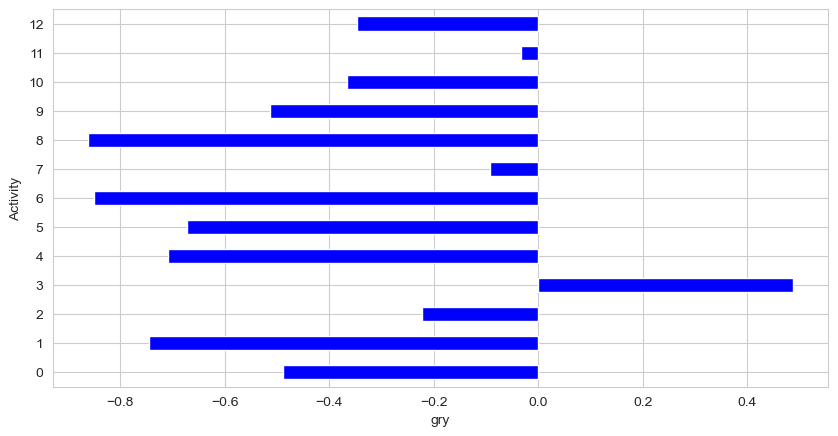

In [109]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['gry'].mean().plot(kind='barh',color='blue')
plt.xlabel('gry')
data.groupby('Activity')['gry'].mean()

* Activity Lying down have more gyro from the right-lower-arm sensor (y axis)

Activity
0     0.221771
1     0.172305
2     0.407203
3     0.625651
4     0.488101
5     0.297499
6     0.090729
7     0.531787
8     0.048028
9     0.768059
10    0.072544
11    0.708951
12    0.218426
Name: grz, dtype: float64

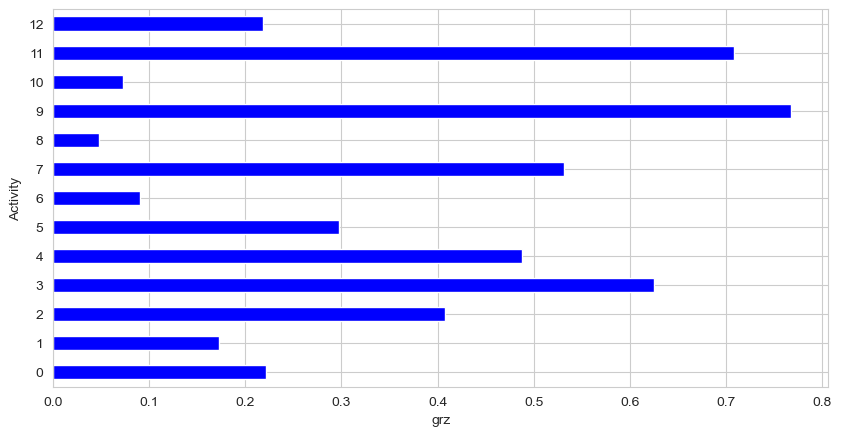

In [110]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Activity')['grz'].mean().plot(kind='barh',color='blue')
plt.xlabel('grz')
data.groupby('Activity')['grz'].mean()

* Activity Cycling have more gyro from the right-lower-arm sensor (z axis)

# Multivariate Analysis:

In [111]:
def imputer(value):
    if value<=6:
        return 'Activity grp1'
    else:
        return 'Activity gr2'

In [112]:
data['Activity']=data['Activity'].apply(imputer)

In [43]:
data['Activity'].unique()

array(['Activity grp1', 'Activity gr2'], dtype=object)

In [44]:
def imputer(value):
    if value=='subject1'or value=='subject2' or value=='subject3' or value=='subject4' or value=='subject5':
        return 'subject grp1'
    else:
        return 'subject grp2'

In [45]:
data['subject']=data['subject'].apply(imputer)

In [46]:
data['subject'].unique()

array(['subject grp1', 'subject grp2'], dtype=object)

<AxesSubplot:xlabel='alx', ylabel='Activity'>

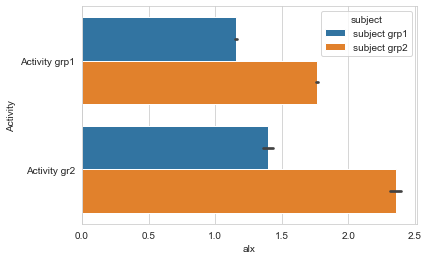

In [47]:
sns.barplot(x='alx',y='Activity',hue='subject',data=data)

* Volunteer group 2 in Activity grp2 have more acceleration from the left-ankl-sensor (X axis)

<AxesSubplot:xlabel='glx', ylabel='Activity'>

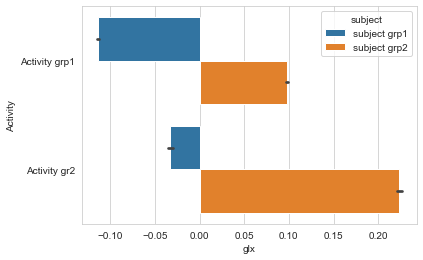

In [48]:
sns.barplot(x='glx',y='Activity',hue='subject',data=data)

<AxesSubplot:xlabel='arx', ylabel='Activity'>

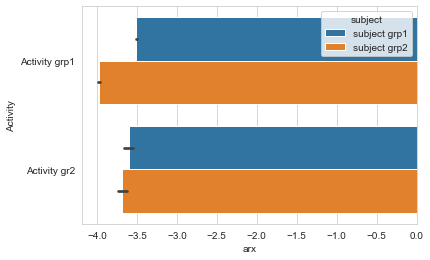

In [49]:
sns.barplot(x='arx',y='Activity',hue='subject',data=data)

<AxesSubplot:xlabel='grx', ylabel='Activity'>

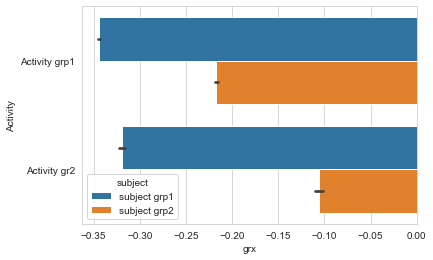

In [50]:
sns.barplot(x='grx',y='Activity',hue='subject',data=data)

# Correlation:

In [51]:
cor=data.corr()

<AxesSubplot:>

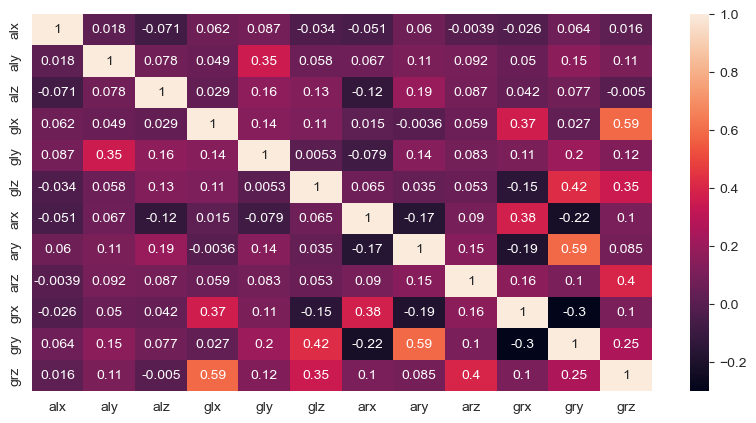

In [52]:
plt.figure(figsize=[10,5],dpi=100)
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

* On correlation we see that the variable grz and glx having strong positive correlation means as grz increases glx aslo increases and also variable ary and gry having strong positive correlation means as ary increases gry also increases

# ANOVA

In [53]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [54]:
model=ols('alx~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,1.323023e+05,1.0,9103.465286,0.0
Residual,1.766861e+07,1215743.0,NaN,NaN


In [55]:
model=ols('aly~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,6.336289e+03,1.0,364.268184,3.405077e-81
Residual,2.114733e+07,1215743.0,NaN,NaN


In [56]:
model=ols('alz~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,1.689229e+05,1.0,5689.102384,0.0
Residual,3.609829e+07,1215743.0,NaN,NaN


In [57]:
model=ols('glx~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,14385.949650,1.0,62694.388614,0.0
Residual,278966.235609,1215743.0,NaN,NaN


In [58]:
model=ols('gly~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,305.410140,1.0,2433.181536,0.0
Residual,152598.659263,1215743.0,NaN,NaN


In [59]:
model=ols('glz~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,73.216186,1.0,244.929214,3.352446e-55
Residual,363419.553715,1215743.0,NaN,NaN


In [60]:
model=ols('arx~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,5.276228e+04,1.0,2329.627619,0.0
Residual,2.753460e+07,1215743.0,NaN,NaN


In [61]:
model=ols('ary~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,1.160078e+05,1.0,3509.537399,0.0
Residual,4.018641e+07,1215743.0,NaN,NaN


In [62]:
model=ols('arz~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,2.494218e+05,1.0,16827.661823,0.0
Residual,1.801990e+07,1215743.0,NaN,NaN


In [63]:
model=ols('grx~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,5867.247202,1.0,21442.294052,0.0
Residual,332663.319417,1215743.0,NaN,NaN


In [64]:
model=ols('gry~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,1076.489398,1.0,3497.915034,0.0
Residual,374147.009807,1215743.0,NaN,NaN


In [65]:
model=ols('grz~subject',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
subject,50.743595,1.0,159.328687,1.594481e-36
Residual,387194.368514,1215743.0,NaN,NaN


* Here we observe that the p-value < 0.05 hence the categorical variable subject does not have an impact on the any numerical variables.

In [66]:
model=ols('grz~Activity',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Activity,4091.629670,1.0,12982.708908,0.0
Residual,383153.482439,1215743.0,NaN,NaN


In [67]:
model=ols('arx~Activity',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Activity,9.675543e+02,1.0,42.640486,6.580937e-11
Residual,2.758640e+07,1215743.0,NaN,NaN


In [68]:
model=ols('ary~Activity',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Activity,1.191699e+05,1.0,3605.48102,0.0
Residual,4.018324e+07,1215743.0,NaN,NaN


In [69]:
model=ols('arz~Activity',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Activity,1.166571e+02,1.0,7.763063,0.005333
Residual,1.826921e+07,1215743.0,NaN,NaN


* Here we observe that the p-value < 0.05 hence categorical variable Activity does not have an impact on the any numerical variables.